In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [47]:
def mean(x):
    """
    SUM(x) / no. x
    """
    return sum(x) / (len(x))

In [4]:
def variance(x):
    """
    SUM(X - mean(X)^2) / (no. X - 1)
    """
    return sum((x - mean(x)) ** 2) / (len(x) - 1)

In [5]:
def covariance(x, y):
    """
    SUM(X - mean(X) * (y - mean(y))) / (no. X - 1)
    """
    return sum((x - mean(x)) * (y - mean(y))) / (len(x) - 1)

In [6]:
X = np.random.randn(100)

In [7]:
y = np.random.randn(100)

In [8]:
def median(num):
    """
    middle value
    """
    if len(num) % 2 != 0:  # it is odd
        mid_number_index = len(num) // 2
        return num[mid_number_index]
    else: # it is even
        interval_right = (len(num) // 2) + 1
        interval_left = (len(num) // 2) - 1
        return mean(num[interval_left: interval_right])

In [9]:
def mode(list_):
    """
    value with highest frequency
    """
    counter = dict()
    for i in list_:
        counter[i] = 0
    
    for i in list_:
        counter[i] += 1
    
    max_val = 0
    mode_num = 0
    for key, value in counter.items():
        if value > max_val:
            max_val = value
            mode_num = key
    
    return mode_num

In [10]:
from matplotlib import pyplot as plt

In [30]:
def simulate_prices(start_price, size):
    """
    simulating prices as a random walk with drift
    
    https://people.duke.edu/~rnau/411rand.htm  * 
    """
    y = list()
    x = list()
    for i in range(size):
        if i == 0:
            y.append(start_price)
        else:
            y.append(1.* y[-1] + np.random.randn())
        x.append(i)
    return x, y

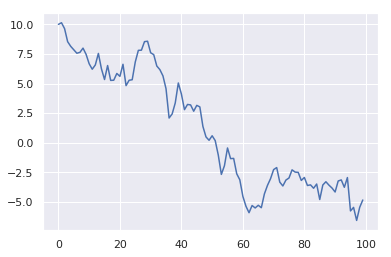

In [35]:
X, y = simulate_prices(start_price=10, size=100)
plt.plot(X, y)
plt.show()

## Multiple plots

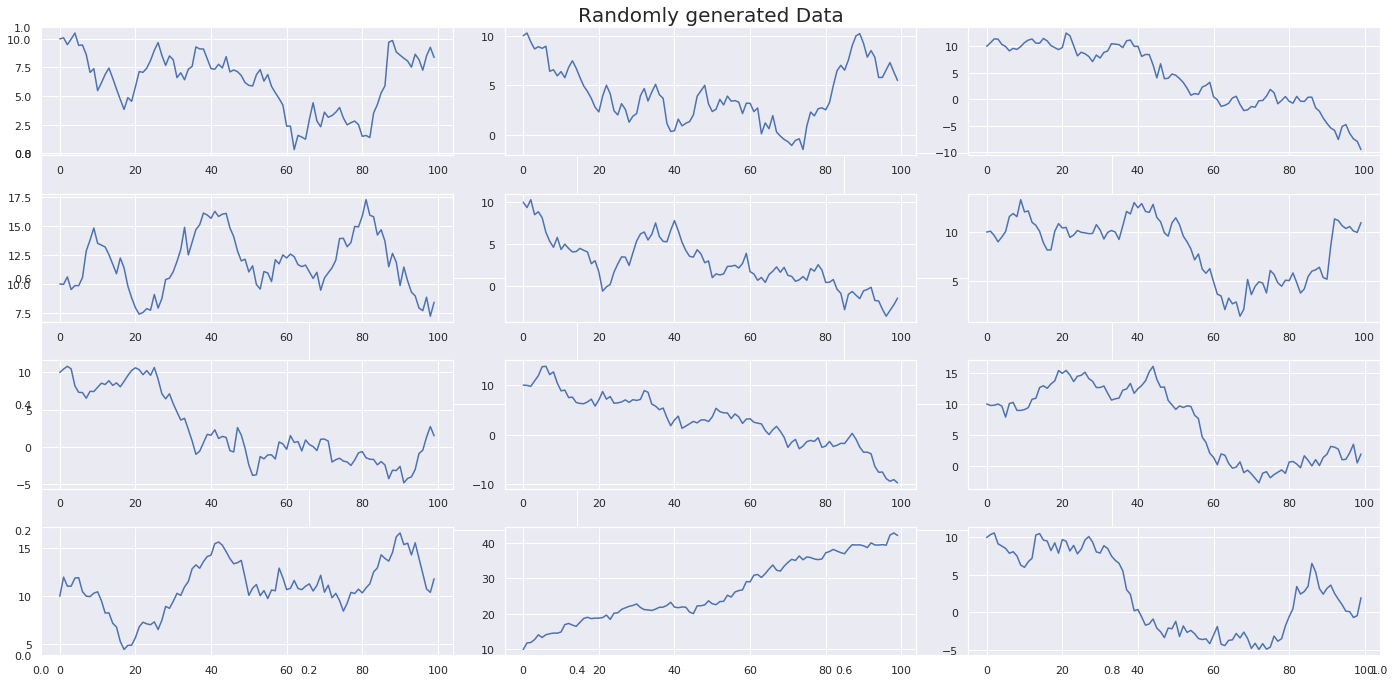

In [36]:
fig = plt.figure(figsize=(20, 10))
plt.title('Randomly generated Data', size=20)
for i in range(12):
    X, y = simulate_prices(start_price=10, size=100)
    axs = fig.add_subplot(4, 3, i + 1)
    axs.plot(X, y)
plt.tight_layout()
plt.show()

## Bar chart

In [37]:
X = np.random.randint(low=10, high=50, size=1000)

In [38]:
def counter(list_):
    counter = dict()
    for i in list_:
        counter[i] = 0
    
    for i in list_:
        counter[i] += 1
    return counter

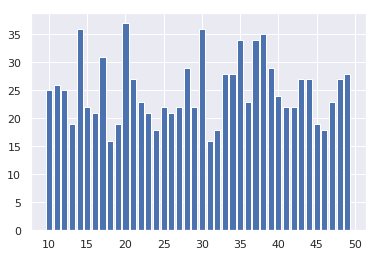

In [39]:
plt.bar(counter(X).keys(), counter(X).values())
plt.show()

In [52]:
x, prices = simulate_prices(start_price=100, size=1000)

In [53]:
def moving_average(data, num_days):
    
    moving_average_list = list()
    intervals = list()
    increments = num_days
    for i in range(0, len(data), num_days):
        intervals.append(mean([i, i + increments]))
        moving_average_list.append(mean(data[i:i + increments]))
    return intervals, moving_average_list

In [54]:
intervals, ma = moving_average(prices, 10)
intervals20, ma20 = moving_average(prices, 20)

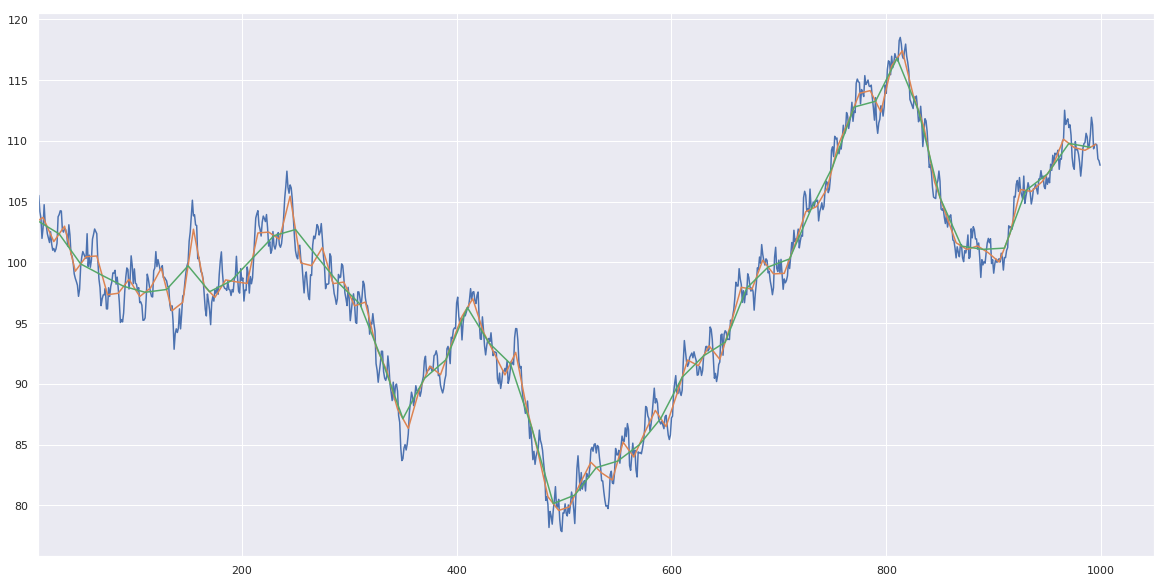

In [56]:
plt.figure(figsize=(20, 10))
plt.plot(x, prices)
plt.plot(intervals, ma)
plt.plot(intervals20, ma20)
plt.xlim(min(intervals20))
plt.show()

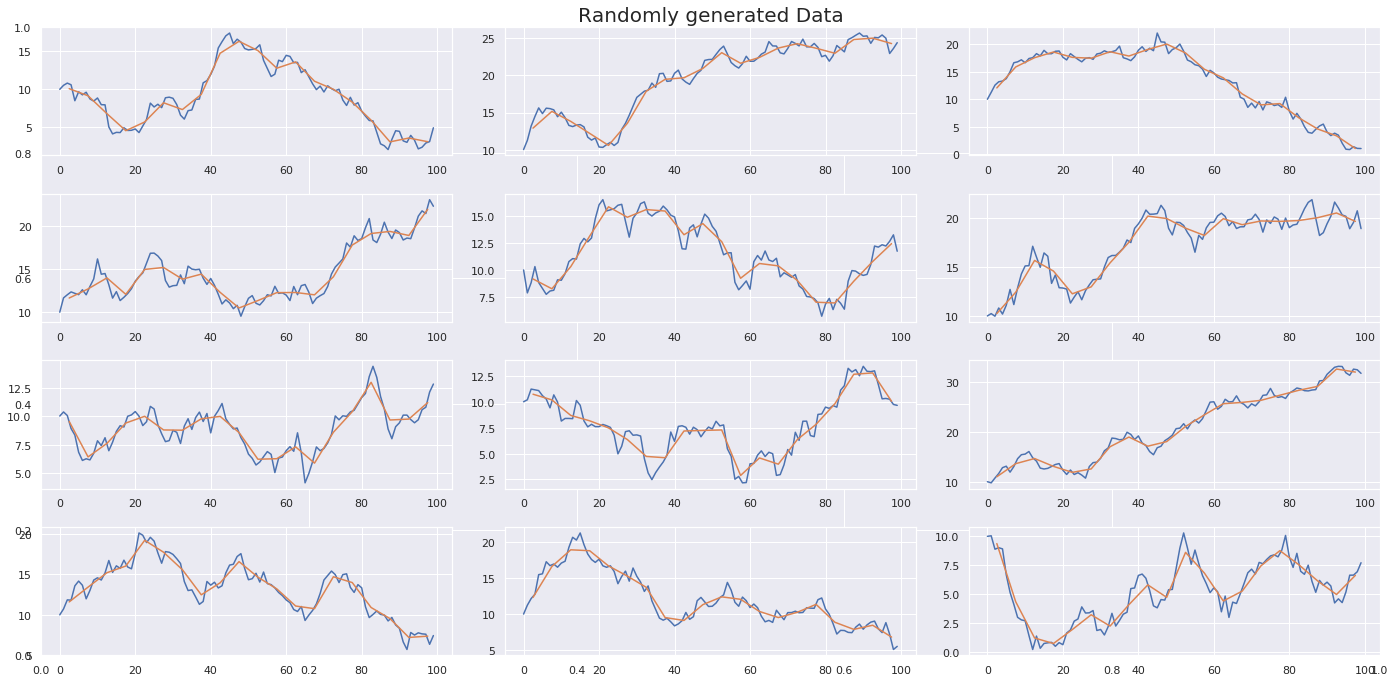

In [61]:
fig = plt.figure(figsize=(20, 10))
plt.title('Randomly generated Data', size=20)
for i in range(12):
    X, y = simulate_prices(start_price=10, size=100)
    intervals, ma = moving_average(y, 5)
    axs = fig.add_subplot(4, 3, i + 1)
    axs.plot(X, y)
    axs.plot(intervals, ma)
plt.tight_layout()
plt.show()